# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [7]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\a.nemogushcha\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [11]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

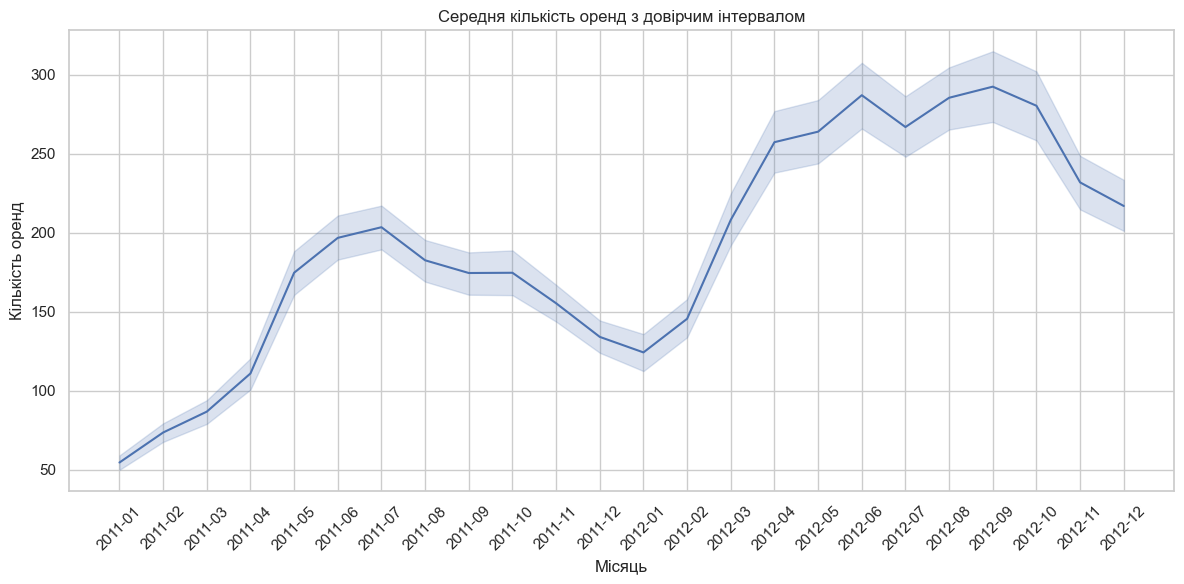

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month_year', y='count', data=df)
plt.xticks(rotation=45)
plt.title('Середня кількість оренд з довірчим інтервалом')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.tight_layout()
plt.show()

Де синя тінь навколо лінії ширша - це 2012 рік від 4 місяця до 10

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

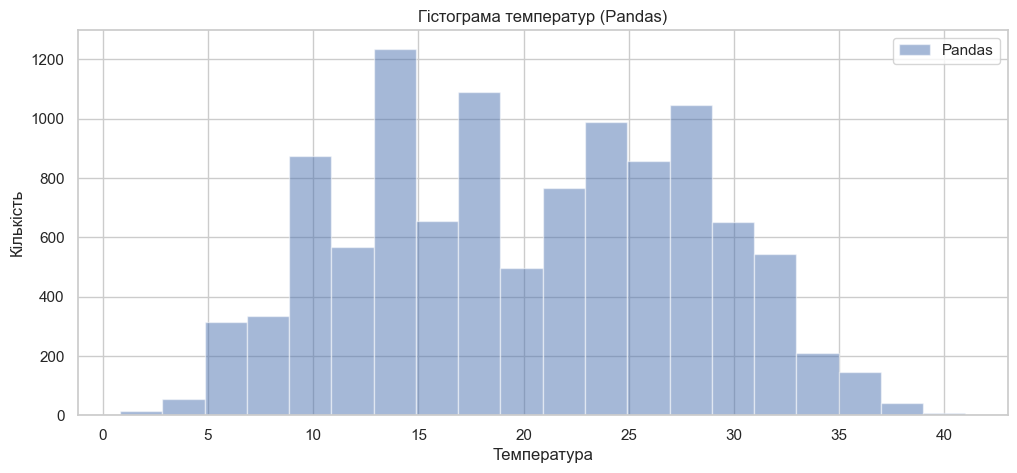

In [13]:
plt.figure(figsize=(12,5))
df['temp'].plot(kind='hist', bins=20, alpha=0.5, label='Pandas')
plt.title('Гістограма температур (Pandas)')
plt.xlabel('Температура')
plt.ylabel('Кількість')
plt.legend()
plt.show()


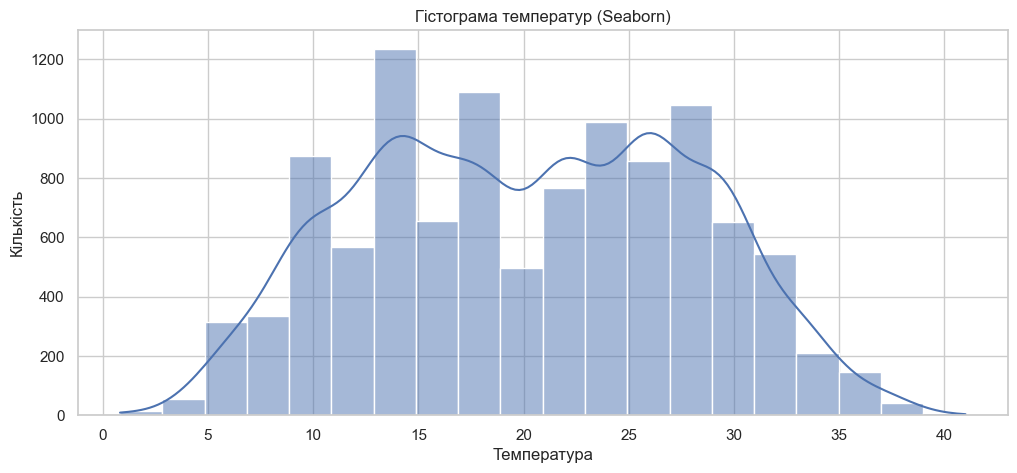

In [14]:
plt.figure(figsize=(12,5))
sns.histplot(df['temp'], bins=20, kde=True)
plt.title('Гістограма температур (Seaborn)')
plt.xlabel('Температура')
plt.ylabel('Кількість')
plt.show()

In [ ]:
кращий дизайн і код меньше

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

<Figure size 800x500 with 0 Axes>

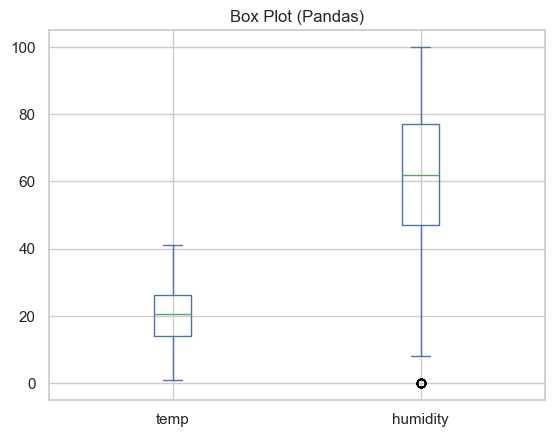

In [15]:
plt.figure(figsize=(8,5))
df[['temp', 'humidity']].plot(kind='box')
plt.title('Box Plot (Pandas)')
plt.show()


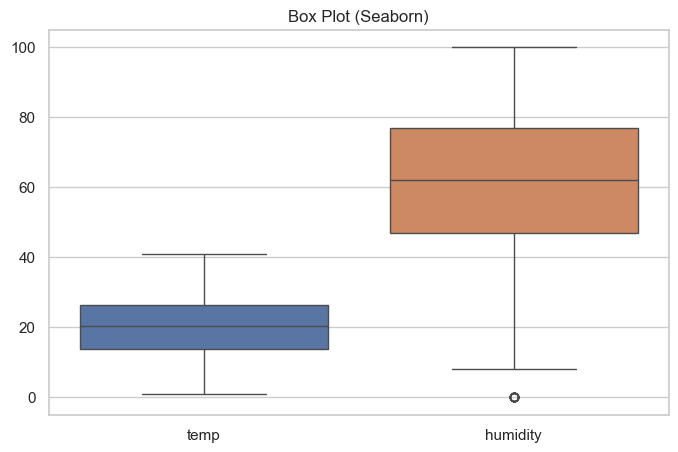

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['temp', 'humidity']])
plt.title('Box Plot (Seaborn)')
plt.show()

Seaborn - красивіша

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [17]:
corr = df[['temp', 'humidity', 'windspeed', 'count']].corr()

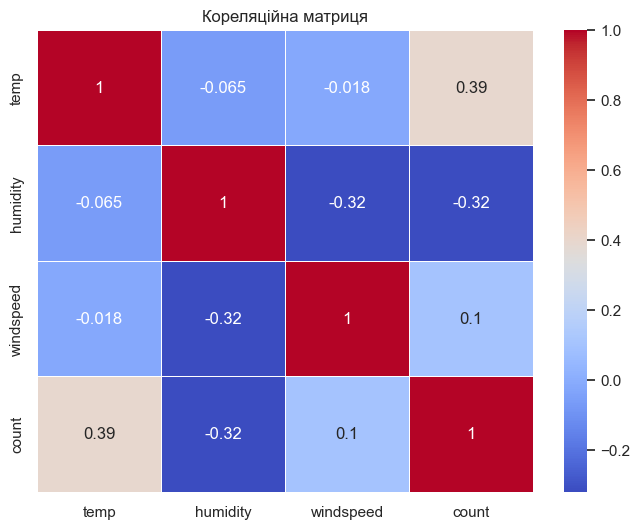

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

1. Температура має найбільшу позитивну кореляцію (0.39).
2. Позитивна між temp та atemp- при теплішій погоді люди частіше катаються на велосипедах
3. humidity та windspeed– чим вони вищі, тим оренд менше.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


C:\Users\a.nemogushcha\AppData\Local\Temp\ipykernel_7456\1296979660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='season', y='count', data=df, palette='Set2')


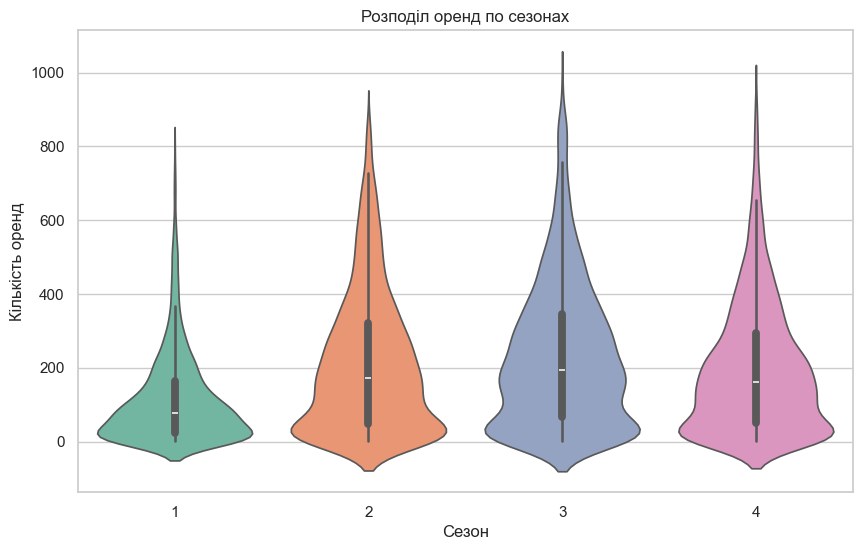

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x='season', y='count', data=df, palette='Set2')
plt.title('Розподіл оренд по сезонах')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.show()


1. товщина показує де даних найбільше
2.  У літньому сезоні (2)— найширший діапазон значень і найбільша кількість оренд
3. violin plot  показує не тільки медіану і квартилі, а ще й повний розподіл даних

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

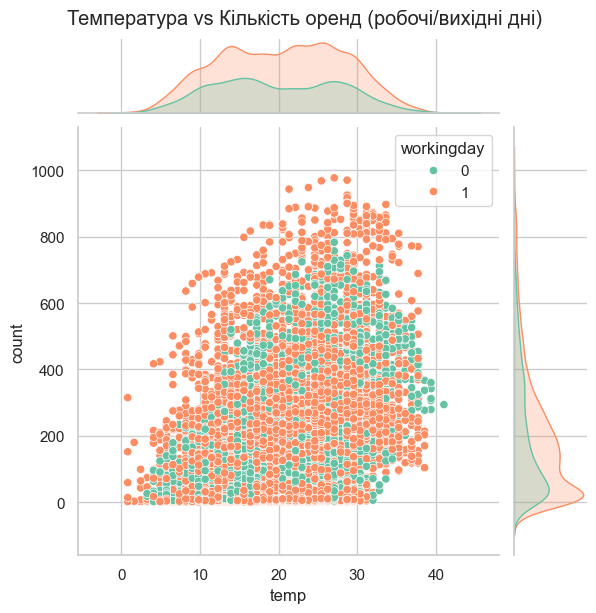

In [22]:
sns.jointplot(x='temp', y='count', data=df, hue='workingday', kind='scatter', palette='Set2')
plt.suptitle('Температура vs Кількість оренд (робочі/вихідні дні)', y=1.02)
plt.show()


1. показують розподіл температури та кількості оренд окремо
2. Так, у вихідні дні оренд трохи більше при комфортній температурі, а у робочі дні попит більш рівномірний